In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
# csv = pd.read_csv("./player_stats_contracts.csv")
# csv

In [12]:
player_avg = pd.read_csv("./player_avg.csv")
player_avg['avg-sal'] = pd.to_numeric(player_avg['avg-sal'])

ValueError: Unable to parse string "  " at position 0

In [14]:
data = {
    "name": [
        "Justin Jefferson",
        "A.J. Brown",
        "CeeDee Lamb",
        "Tyreek Hill",
        "D.K. Metcalf",
        "Amon-Ra St.Brown",
        "Darius Slayton",
        "Jakobi Meyers",
        "Michael Pittman Jr.",
        "Davante Adams",
        "Nico Collins",
        "Calvin Ridley",
        "Jerry Jeudy",
        "Courtland Sutton",
        "DeAndre Hopkins",
        "Christian Kirk",
        "Jaylen Waddle",
    ],
    "pos": [
        "wr1",
        "wr1",
        "wr1",
        "wr1",
        "wr1",
        "wr1",
        "wr1",
        "wr1",
        "wr1",
        "wr1",
        "wr1",
        "wr1",
        "wr1",
        "wr1",
        "wr2",
        "wr2",
        "wr2",
    ],
    "season": [
        2024,
        2023,
        2023,
        2023,
        2023,
        2023,
        2023,
        2022,
        2023,
        2024,
        2023,
        2023,
        2022,
        2019,
        2024,
        2021,
        2023,
    ],
    "games": [17, 17, 17, 16, 16, 16, 17, 14, 16, 14, 15, 17, 15, 16, 16, 17, 14],
    "tgt": [
        154,
        158,
        152,
        171,
        119,
        164,
        79,
        96,
        156,
        141,
        109,
        136,
        100,
        124,
        80,
        103,
        104,
    ],
    "rec": [103, 106, 135, 119, 66, 119, 50, 67, 109, 85, 80, 76, 67, 72, 56, 77, 72],
    "yds": [
        1533,
        1456,
        1749,
        1799,
        1114,
        1515,
        770,
        804,
        1152,
        1063,
        1297,
        1016,
        972,
        1112,
        610,
        982,
        1014,
    ],
    "y-r": [
        14.9,
        13.7,
        13.0,
        15.1,
        16.9,
        12.7,
        15.4,
        12.0,
        10.6,
        12.5,
        16.2,
        13.4,
        14.5,
        15.4,
        10.9,
        12.8,
        12.8,
    ],
    "td": [10, 7, 12, 13, 8, 12, 6, 6, 4, 8, 8, 8, 6, 6, 5, 5, 4],
    "1d": [62, 70, 80, 83, 52, 75, 29, 38, 53, 49, 53, 49, 41, 50, 35, 44, 47],
    "succ": [
        57.1,
        56.3,
        63.5,
        57.9,
        51.3,
        61.3,
        49.4,
        54.7,
        51.9,
        46.8,
        61.5,
        48.5,
        52,
        49.2,
        60,
        60.2,
        58.7,
    ],
    "avg-sal": [35, 32, 34, 30, 33, 30, 11, 11, 23, 22, 24, 23, 17.5, 15, 5, 18, 28],
}

player_avg = pd.DataFrame(data)

In [15]:
avg_corr = player_avg[
    ["games", "tgt", "rec", "yds", "y-r", "td", "1d", "succ", "avg-sal"]
].corr()

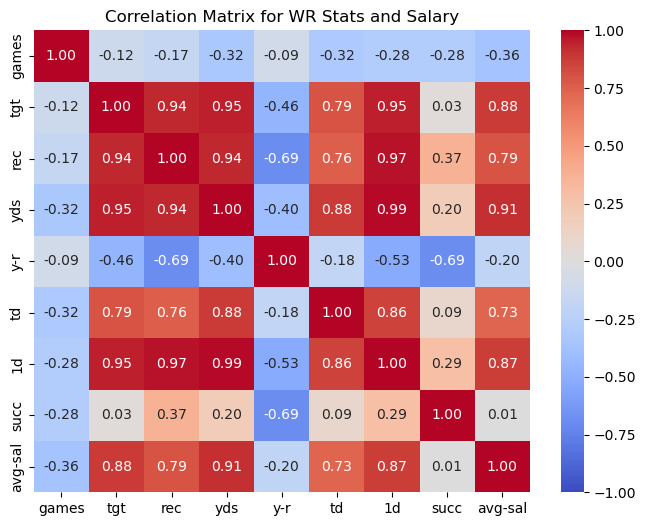

In [34]:
# Compute correlation matrix
correlation = avg_corr[
    ["games", "tgt", "rec", "yds", "y-r", "td", "1d", "succ", "avg-sal"]
].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix for WR Stats and Salary")
plt.show()

In [26]:
features = ['games','yds','y-r','1d','succ']
X = player_avg[features]
y = player_avg['avg-sal']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                avg-sal   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     5.476
Date:                Wed, 12 Mar 2025   Prob (F-statistic):            0.00900
Time:                        15:00:58   Log-Likelihood:                -50.378
No. Observations:                  17   AIC:                             112.8
Df Residuals:                      11   BIC:                             117.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0883     29.526      0.037      0.9

/Users/vernon/miniconda3/envs/ml_env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data["yds"], data["avg-sal"])
plt.xlabel("Yards")
plt.ylabel("Average Salary")
plt.show()

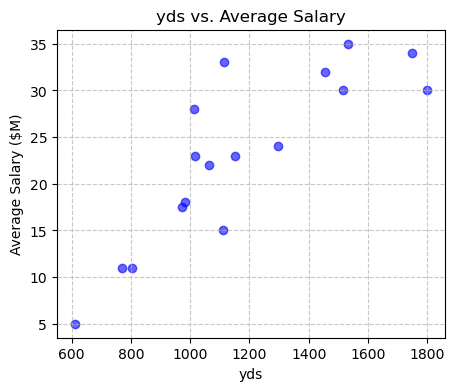

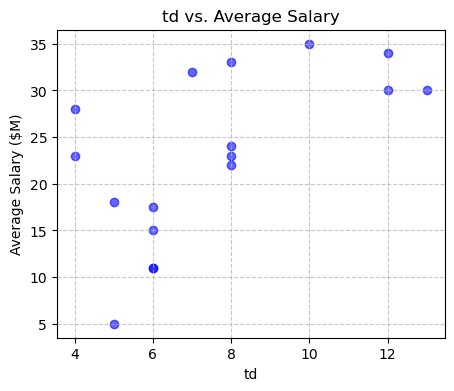

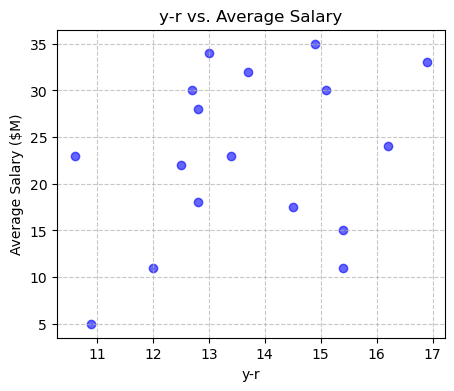

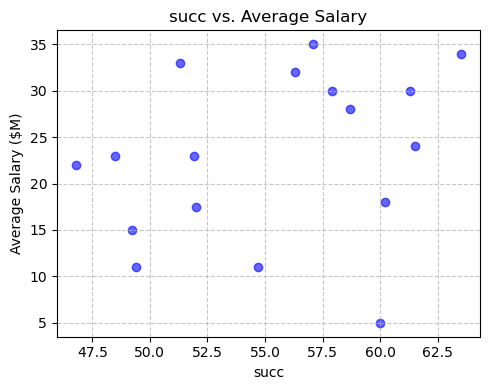

In [31]:
# Features to plot
features = ["yds", "td", "y-r", "succ"]

# Create four separate figures and plot them
for i, feature in enumerate(features):
    plt.figure(figsize=(5, 4))  # Individual figure size (width, height)
    plt.scatter(data[feature], data["avg-sal"], color="blue", alpha=0.6)
    plt.title(f"{feature} vs. Average Salary")
    plt.xlabel(feature)
    plt.ylabel("Average Salary ($M)")
    plt.grid(True, linestyle="--", alpha=0.7)

# Adjust layout to group them together
plt.tight_layout()

# Show all plots
plt.show()

This seems to show that Yards is the only linear feature.

Will need to look at other approaches.

In [52]:
non_lin = player_avg[['name','yds', 'td', 'succ','avg-sal']].copy()
non_lin

,name,yds,td,succ,avg-sal
0,Justin Jefferson,1533,10,57.1,35.0
1,A.J. Brown,1456,7,56.3,32.0
2,CeeDee Lamb,1749,12,63.5,34.0
3,Tyreek Hill,1799,13,57.9,30.0
4,D.K. Metcalf,1114,8,51.3,33.0
5,Amon-Ra St.Brown,1515,12,61.3,30.0
6,Darius Slayton,770,6,49.4,11.0
7,Jakobi Meyers,804,6,54.7,11.0
8,Michael Pittman Jr.,1152,4,51.9,23.0
9,Davante Adams,1063,8,46.8,22.0


In [53]:
non_lin['td_squared'] = non_lin['td']**2
non_lin['succ_squared'] = non_lin['succ']**2

In [54]:
non_lin['yds_bin'] = pd.cut(data['yds'], bins=[0,500,1000,2000], labels=['Low','Mid','High'])

In [55]:
non_lin

,name,yds,td,succ,avg-sal,td_squared,succ_squared,yds_bin
0,Justin Jefferson,1533,10,57.1,35.0,100,3260.41,High
1,A.J. Brown,1456,7,56.3,32.0,49,3169.69,High
2,CeeDee Lamb,1749,12,63.5,34.0,144,4032.25,High
3,Tyreek Hill,1799,13,57.9,30.0,169,3352.41,High
4,D.K. Metcalf,1114,8,51.3,33.0,64,2631.69,High
5,Amon-Ra St.Brown,1515,12,61.3,30.0,144,3757.69,High
6,Darius Slayton,770,6,49.4,11.0,36,2440.36,Mid
7,Jakobi Meyers,804,6,54.7,11.0,36,2992.09,Mid
8,Michael Pittman Jr.,1152,4,51.9,23.0,16,2693.61,High
9,Davante Adams,1063,8,46.8,22.0,64,2190.24,High


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['yds', 'td', 'succ', 'td_squared']
non_lin[numeric_features] = scaler.fit_transform(non_lin[numeric_features])

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

features = ['yds', 'td','td_squared','succ']
X = non_lin[features]
y = non_lin['avg-sal'] 

X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance
feature_importance = pd.DataFrame(
    {"Feature": features, "Importance": model.feature_importances_}
)
print(
    "\nFeature Importance:\n",
    feature_importance.sort_values(by="Importance", ascending=False),
)

Mean Squared Error: 68.01
R-squared: -0.63

Feature Importance:
       Feature  Importance
0         yds    0.651381
3        succ    0.206215
1          td    0.080119
2  td_squared    0.062285
